In [2]:
import torch
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np

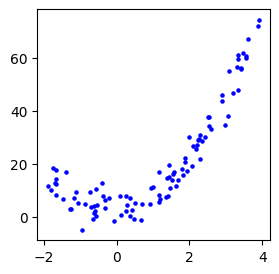

In [109]:

def poly(x):
    """Create polynomial features from vector x."""
    return torch.stack([torch.ones_like(x), x, x**2], axis=1)

def predict(X, beta):
    return torch.sum(beta * X, axis=1)

def loss_fn(y_pred, y_true):
    return torch.pow(y_pred - y_true, 2).sum() / len(y_pred)

def plot_results(beta, ax, c='k'):
    xp = torch.linspace(-2, 4, 50).requires_grad_(False)
    yp = predict(poly(xp), beta.clone()).detach().numpy()
    ax.plot(xp, yp, color=c)
    return


beta_true = torch.tensor([3.0, 1.2, 4.3])
x_true = torch.tensor(ss.uniform(-2, 6).rvs(100))
y_true = predict(poly(x_true), beta_true) + ss.norm(0, 4.0).rvs(100)

fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(x_true, y_true, color='b', s=5)
plt.show()


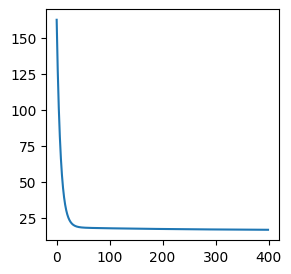

In [110]:
num_iters = 400
lr = 1e-3
losses = []
X = poly(x_true)
beta = torch.tensor([2.0, 2.0, 2.0], requires_grad=True)

for iter in range(num_iters):

    y_pred = predict(X, beta)
    loss = loss_fn(y_pred, y_true)
    loss.backward()
    loss_item = loss.item()

    with torch.no_grad():
        beta -= beta.grad * lr

        beta.grad.zero_()
        losses.append(loss_item)

fig, ax = plt.subplots(figsize=(3,3))
ax.plot(losses)
plt.show()

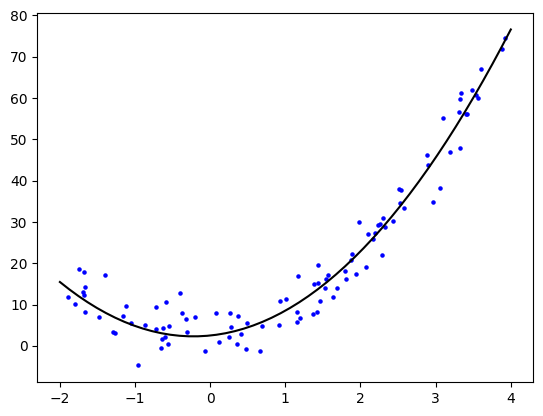

In [111]:
fig, ax = plt.subplots()
ax.scatter(x_true, y_true, color='blue', s=5)
plot_results(beta, ax)